In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from IPython.display import clear_output

In [2]:
data = pd.read_csv('C:\\Users\\User\\Downloads\\Data\\social_network_ads.csv', usecols=[2, 3, 4])

In [3]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


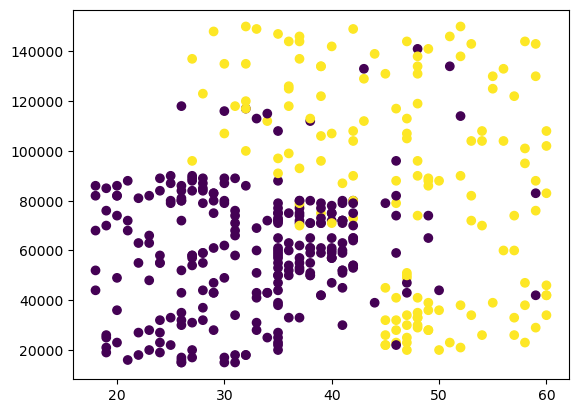

In [4]:
plt.scatter(data.iloc[:,0].values, data.iloc[:,1].values, c=data.iloc[:,-1].values)

In [5]:
def analyze_tree(max_depth):
    data = pd.read_csv('C:\\Users\\User\\Downloads\\Data\\social_network_ads.csv', usecols=[2, 3, 4])
    x = data.iloc[:,:2].values
    y = data.Purchased.values
    
    a = np.arange(start=x[:,0].min()-1, stop=x[:,0].max()+1, step=0.1)
    b = np.arange(start=x[:,1].min()-1, stop=x[:,1].max()+1, step=100)
    xx,yy = np.meshgrid(a,b)
    input_array = np.array([xx.ravel(), yy.ravel()]).T
    
    for i in range(1,max_depth):
        
        dt = DecisionTreeClassifier(max_depth=i).fit(x,y)
        labels = dt.predict(input_array)
        
        clear_output(wait=True)
        plt.contourf(xx,yy,labels.reshape(xx.shape), alpha=0.5)
        plt.scatter(x[:,0],x[:,1],c=y)
        plt.title(f"Max Depth : {i}")
        plt.show()
    return xx,yy, a, b
        

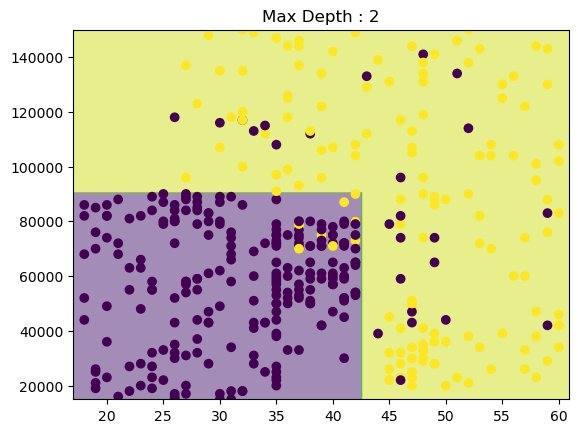

In [6]:
xx,yy, a, b = analyze_tree(3)

In [32]:
print(a.shape,b.shape)

(440,) (1351,)


In [8]:
print(xx.shape, yy.shape)

(1351, 440) (1351, 440)


In [9]:
x = np.arange(50)
y = np.arange(100)
print(x.shape,y.shape)

(50,) (100,)


In [10]:
xx,yy = np.meshgrid(x,y)
print(xx.shape,yy.shape)

(100, 50) (100, 50)


In [29]:
z = np.sqrt(np.square(xx)+np.square(yy))

In [30]:
z.shape

(1351, 440)

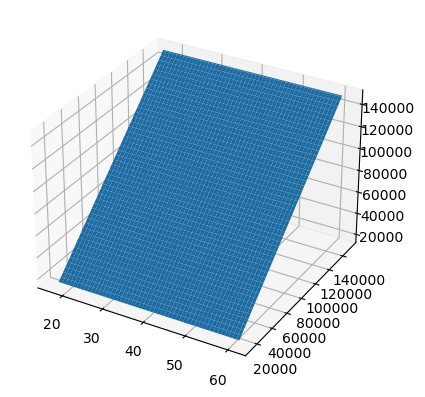

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(xx,yy,z)

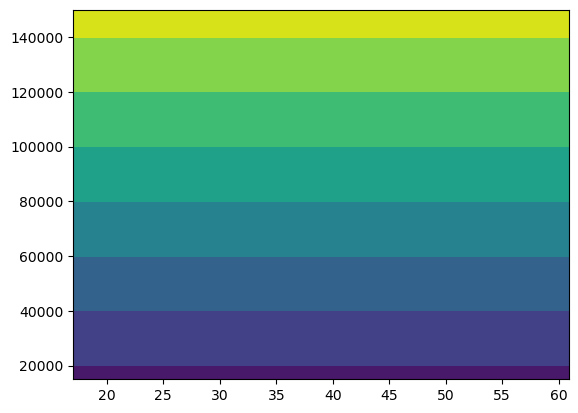

In [32]:
plt.contourf(xx,yy,z)